<a href="https://colab.research.google.com/github/JScottLopez/JScottLopez/blob/main/Lopez_J_DDS_8555v1_Week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Author: Joseph Lopez
#3/21/2025

#Install libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

#Mount google drive
from google.colab import drive
drive.mount('/content/drive')

#Load data from a CSV file
train = pd.read_csv('/content/drive/MyDrive/train.csv')
test = pd.read_csv('/content/drive/MyDrive/test.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Check for null values
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                            20758 non-null  float64
 12  SCC                             

In [ ]:
#Align train and test data columns
train_cols = set(train.columns)
test_cols = set(test.columns)
common_cols = list(train_cols.intersection(test_cols))
if 'NObeyesdad' in train_cols and 'NObeyesdad' not in common_cols:
  train = train[common_cols + ['NObeyesdad']]
else:
  train = train[common_cols + ['NObeyesdad']]

test = test[common_cols]

#Use one hot encoding to sub numerical values for categorical values
train = pd.get_dummies(train, columns=['Gender','family_history_with_overweight','FAVC','CAEC','SMOKE','SCC','CALC','MTRANS'], dtype=int)
test = pd.get_dummies(test, columns=['Gender','family_history_with_overweight','FAVC','CAEC','SMOKE','SCC','CALC','MTRANS'], dtype=int)


In [ ]:
#Ensure output meets submission requirements
target_size = 13840
if len(train) > target_size:
  train = train.sample(n=target_size, random_state=42)

#Subset columns
X = train.drop('NObeyesdad', axis=1)
y = train['NObeyesdad']

#Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(



Confusion Matrix:
[[300  19   0   1   0   3   0]
 [ 36 341   0   0   0  28   6]
 [  0   0 303  33   0   6  32]
 [  0   0  13 414   0   0   5]
 [  0   0   0   0 526   1   0]
 [  5  41   8   0   0 231  64]
 [  0   9  40   2   0  54 247]]

Classification Report:
                     precision    recall  f1-score   support

Insufficient_Weight       0.88      0.93      0.90       323
      Normal_Weight       0.83      0.83      0.83       411
     Obesity_Type_I       0.83      0.81      0.82       374
    Obesity_Type_II       0.92      0.96      0.94       432
   Obesity_Type_III       1.00      1.00      1.00       527
 Overweight_Level_I       0.72      0.66      0.69       349
Overweight_Level_II       0.70      0.70      0.70       352

           accuracy                           0.85      2768
          macro avg       0.84      0.84      0.84      2768
       weighted avg       0.85      0.85      0.85      2768



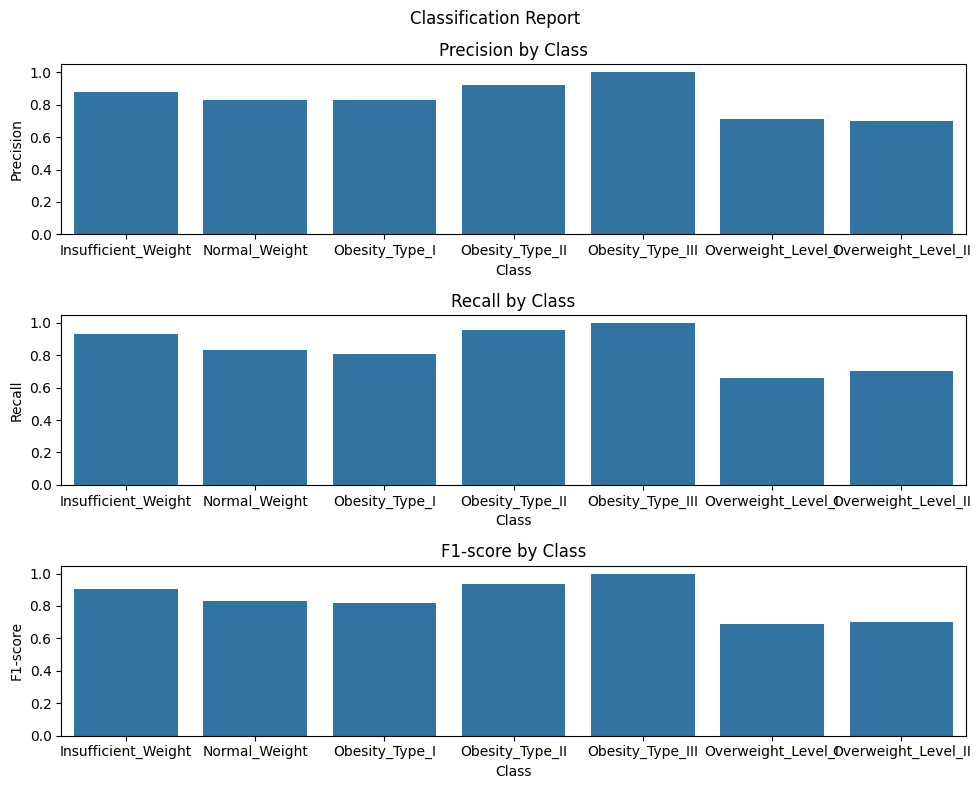

In [ ]:
#Multinominal Logistic Regression
#Initialize and fit model
MLR_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
MLR_model.fit(X_train_scaled, y_train)

#Make predictions
y_pred = MLR_model.predict(X_test_scaled)

#Evaluate model
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, output_dict=True)
feature_names = X.columns
coefficients = MLR_model.coef_
print('\nConfusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('\nClassification Report:')
print(classification_report(y_test, y_pred))

#Plot results
metrics = ['precision', 'recall', 'f1-score']
fig, axes = plt.subplots(3, 1, figsize=(10, 8))
fig.suptitle('Classification Report')
for i, metric in enumerate(metrics):
    ax = axes[i]
    class_scores = [class_report[label][metric] for label in MLR_model.classes_]
    sns.barplot(x=MLR_model.classes_, y=class_scores, ax=ax)
    ax.set_title(f'{metric.capitalize()} by Class')
    ax.set_xlabel('Class')
    ax.set_ylabel(metric.capitalize())
plt.tight_layout()
plt.show()

#Convert output to CSV file
test_data_for_prediction = test.drop('id', axis=1)
missing_cols = set(X_train.columns) - set(test_data_for_prediction.columns)
for col in missing_cols:
    test_data_for_prediction[col] = 0
test_data_for_prediction = test_data_for_prediction[X_train.columns]

submission1 = pd.DataFrame({'id': test['id'], 'NObeyesdad': MLR_model.predict(scaler.transform(test_data_for_prediction))})


Confusion Matrix:
[[287  32   0   1   0   2   1]
 [ 53 309   1   0   0  39   9]
 [  0   2 280  48   1  10  33]
 [  0   0  17 410   0   0   5]
 [  0   0   0   1 525   1   0]
 [  7  54  11   0   0 207  70]
 [  0  11  43   1   0  52 245]]
[[287  32   0   1   0   2   1]
 [ 53 309   1   0   0  39   9]
 [  0   2 280  48   1  10  33]
 [  0   0  17 410   0   0   5]
 [  0   0   0   1 525   1   0]
 [  7  54  11   0   0 207  70]
 [  0  11  43   1   0  52 245]]

Classification Report:
                     precision    recall  f1-score   support

Insufficient_Weight       0.83      0.89      0.86       323
      Normal_Weight       0.76      0.75      0.75       411
     Obesity_Type_I       0.80      0.75      0.77       374
    Obesity_Type_II       0.89      0.95      0.92       432
   Obesity_Type_III       1.00      1.00      1.00       527
 Overweight_Level_I       0.67      0.59      0.63       349
Overweight_Level_II       0.67      0.70      0.69       352

           accuracy             

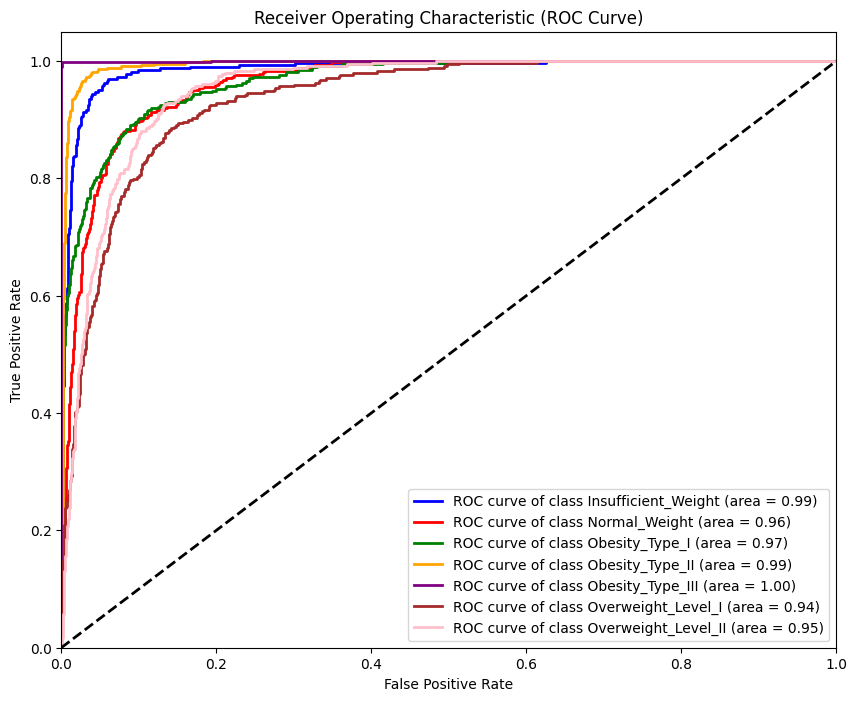

In [ ]:
#Linear Discriminant Analysis
#Initialize and fit model
LDA_model = LinearDiscriminantAnalysis()
LDA_model.fit(X_train_scaled, y_train)
#Make predictions
y_pred = LDA_model.predict(X_test_scaled)
y_pred_proba = LDA_model.predict_proba(X_test_scaled)
#Evaluate model
print('Confusion Matrix:')
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(confusion_matrix(y_test, y_pred))
print('\nClassification Report:')
print(classification_report(y_test, y_pred))
#Plot ROC Curve
n_classes = len(LDA_model.classes_)
y_test_bin = label_binarize(y_test, classes=LDA_model.classes_)
y_pred_proba = LDA_model.predict_proba(X_test_scaled)
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
  fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
  roc_auc[i] = auc(fpr[i], tpr[i])
plt.figure(figsize=(10, 8))
color  = ['blue', 'red', 'green', 'orange', 'purple', 'brown', 'pink']
for i, color in zip(range(n_classes), color):
  plt.plot(fpr[i], tpr[i], color=color, lw=2, label='ROC curve of class {0} (area = {1:0.2f})'
  ''.format(LDA_model.classes_[i], roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC Curve)')
plt.legend(loc="lower right")
plt.show()
#Convert to CSV
test_data_for_prediction = test.drop('id', axis=1)
missing_cols = set(X_train.columns) - set(test_data_for_prediction.columns)
for col in missing_cols:
          test_data_for_prediction[col] = 0
test_data_for_prediction = test_data_for_prediction[X_train.columns]
submission2 = pd.DataFrame({'id': test['id'], 'NObeyesdad': LDA_model.predict(scaler.transform(test_data_for_prediction))})


Confusion Matrix: 
[[282   5   1  31   1   3   0]
 [276  39   5  46  16  18  11]
 [  2   7 151 188   1   2  23]
 [  0   1   1 420   0   0  10]
 [  1   0   0   0 526   0   0]
 [102  14  50  88   6  54  35]
 [ 44  11  35 178   0   7  77]]

Classification Report:
                     precision    recall  f1-score   support

Insufficient_Weight       0.40      0.87      0.55       323
      Normal_Weight       0.51      0.09      0.16       411
     Obesity_Type_I       0.62      0.40      0.49       374
    Obesity_Type_II       0.44      0.97      0.61       432
   Obesity_Type_III       0.96      1.00      0.98       527
 Overweight_Level_I       0.64      0.15      0.25       349
Overweight_Level_II       0.49      0.22      0.30       352

           accuracy                           0.56      2768
          macro avg       0.58      0.53      0.48      2768
       weighted avg       0.60      0.56      0.50      2768


Class Priors:
Insufficient_Weight: 0.1243
Normal_Weight: 0.1489


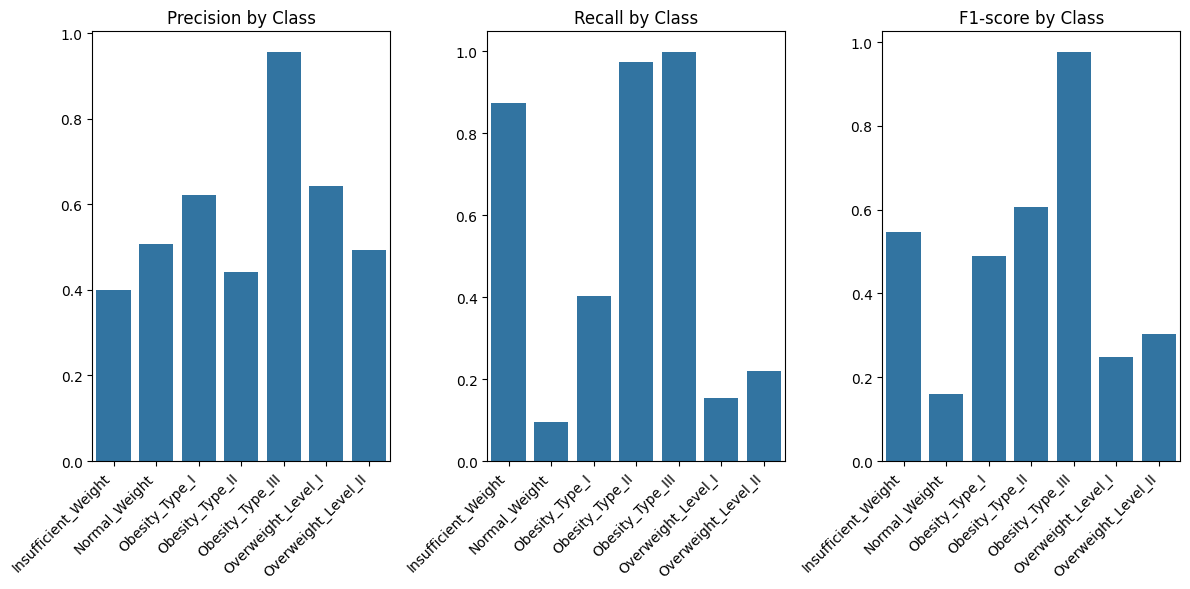

In [ ]:
#Naive Bayes Model
#Initialize and fit model
NB_model = GaussianNB()
NB_model.fit(X_train_scaled, y_train)

#Make predictions
y_pred = NB_model.predict(X_test_scaled)

#Evaluate model
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix: ')
print(cm)
print('\nClassification Report:')
cr = classification_report(y_test, y_pred, output_dict=True)
print(classification_report(y_test, y_pred))

print("\nClass Priors:")
for i, class_label in enumerate(NB_model.classes_):
  print(f"{class_label}: {NB_model.class_prior_[i]:.4f}")

#Plot results
plt.figure(figsize=(12, 6))
metrics = ['precision', 'recall', 'f1-score']
for i, metric in enumerate(metrics, 1):
  plt.subplot(1, 3, i)
  labels = list(cr.keys())[:-3]
  sns.barplot(x=labels, y=[cr[label][metric] for label in labels])
  plt.title(f'{metric.capitalize()} by Class')
  plt.xticks(rotation=45, ha='right')
  plt.tight_layout()
plt.show()

#Convert to CSV
test_data_for_prediction = test.drop('id', axis=1)
missing_cols = set(X_train.columns) - set(test_data_for_prediction.columns)
for col in missing_cols:
  test_data_for_prediction[col] = 0
test_data_for_prediction = test_data_for_prediction[X_train.columns]

submission3 = pd.DataFrame({'id': test['id'], 'NObeyesdad': NB_model.predict(scaler.transform(test_data_for_prediction))})


Confusion Matrix
[[301  19   0   1   0   2   0]
 [ 35 342   0   0   0  31   3]
 [  0   0 312  26   0   5  31]
 [  0   0  15 415   0   0   2]
 [  0   0   1   0 526   0   0]
 [  6  30   7   0   0 249  57]
 [  0   8  34   2   0  49 259]]

Classification Report:
                     precision    recall  f1-score   support

Insufficient_Weight       0.88      0.93      0.91       323
      Normal_Weight       0.86      0.83      0.84       411
     Obesity_Type_I       0.85      0.83      0.84       374
    Obesity_Type_II       0.93      0.96      0.95       432
   Obesity_Type_III       1.00      1.00      1.00       527
 Overweight_Level_I       0.74      0.71      0.73       349
Overweight_Level_II       0.74      0.74      0.74       352

           accuracy                           0.87      2768
          macro avg       0.86      0.86      0.86      2768
       weighted avg       0.87      0.87      0.87      2768



<Figure size 1000x600 with 0 Axes>

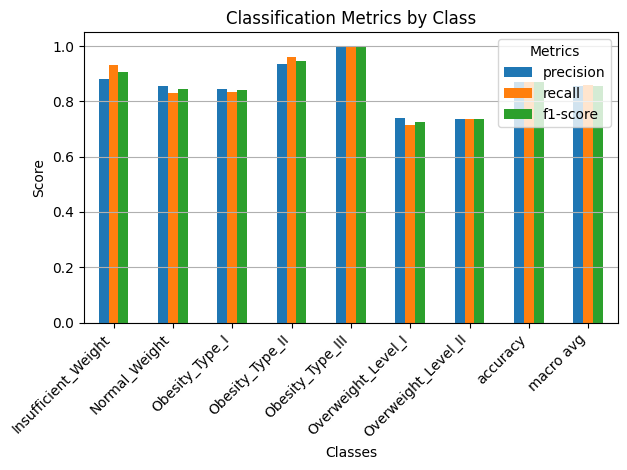

In [ ]:
#SVM Model
#Initialize and fit model
SVM_model = SVC(kernel='linear', decision_function_shape='ovr')
SVM_model.fit(X_train_scaled, y_train)

#Make predictions
y_pred = SVM_model.predict(X_test_scaled)

#Evaluate model
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred))
print('\nClassification Report:')
print(classification_report(y_test, y_pred))


#Plot results
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()
metrics = ['precision','recall', 'f1-score']
report_df = report_df[metrics]
plt.figure(figsize=(10, 6))
report_df[:-1].plot(kind='bar', legend=True)
plt.title('Classification Metrics by Class')
plt.xlabel('Classes')
plt.ylabel('Score')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.legend(title='Metrics')
plt.tight_layout()
plt.show()

#Convert to CSV
test_data_for_prediction = test.drop('id', axis=1)
missing_cols = set(X_train.columns) - set(test_data_for_prediction.columns)
for col in missing_cols:
  test_data_for_prediction[col] = 0
test_data_for_prediction = test_data_for_prediction[X_train.columns]

submission4 = pd.DataFrame({'id': test['id'], 'NObeyesdad': SVM_model.predict(scaler.transform(test_data_for_prediction))})


In [ ]:
#Convert to CSV files

submission1.to_csv('submission1.csv', index=False)
submission2.to_csv('submission2.csv', index=False)
submission3.to_csv('submission3.csv', index=False)
submission4.to_csv('submission4.csv', index=False)